# Add 50% of outlier

In [1]:
import sys
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import outliers_utils
import pandas as pd
import ML_algorithms
from sklearn.metrics import classification_report

# Return to previous directory
os.chdir('..')

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_original = df.copy()
df_original.dropna(axis=0,inplace=True)
df_original = df_original[df_original['age'] >= 0]


df.dropna(axis=0, inplace=True)
df = df[df['age'] >= 0]

outliers_utils.drop_negative_age(df)

## age

In [2]:
df = df_original.copy()

In [3]:
outliers_utils.visualize_outliers_specific(df, 'age')

no outliers detected


In [4]:
df_a = outliers_utils.outliers_replace(df, 'age', 50)

Outliers found:


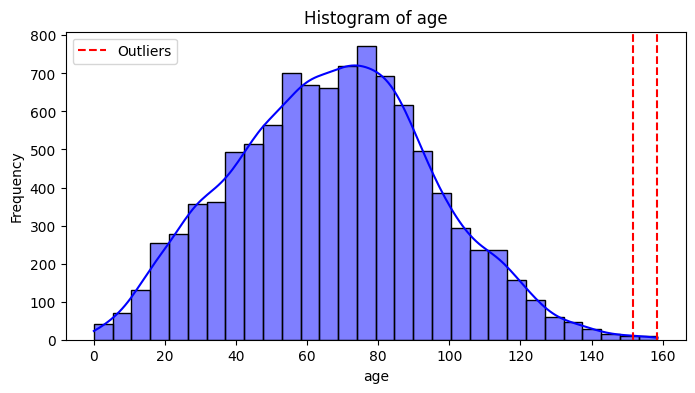

In [5]:
outliers_utils.visualize_outliers_specific(df_a, 'age')

**Decision Tree**

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      3549
           1       0.96      1.00      0.98      3439

    accuracy                           0.98      6988
   macro avg       0.98      0.98      0.98      6988
weighted avg       0.98      0.98      0.98      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1517
           1       0.95      1.00      0.97      1479

    accuracy                           0.97      2996
   macro avg       0.97      0.97      0.97      2996
weighted avg       0.97      0.97      0.97      2996

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      4999
           1       0.95      1.00      0.97      4985

    accuracy                           0.97      9984


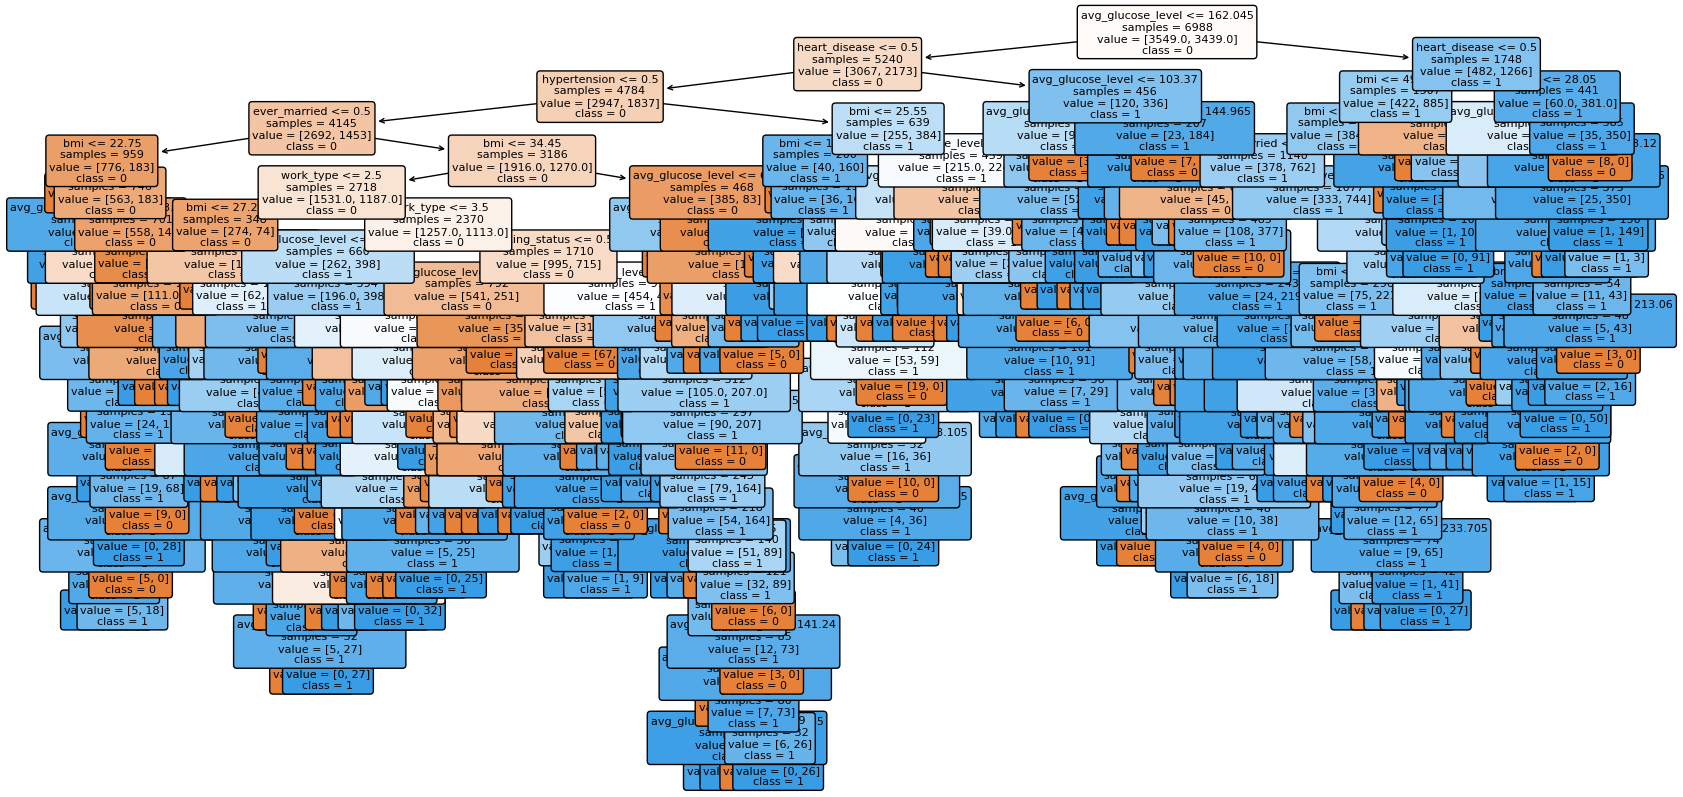

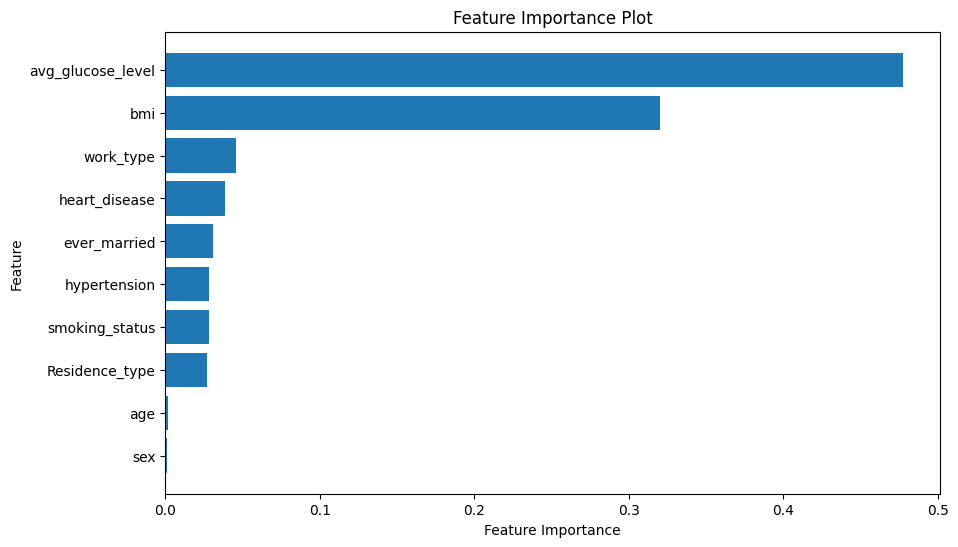

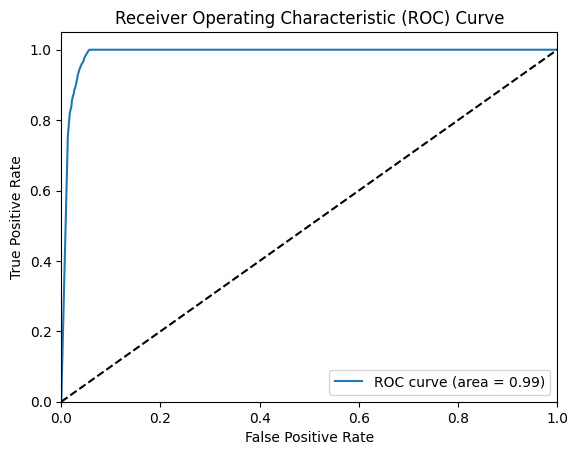

AUC Score: 0.9882008297346531


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9599427753934192, 0.9513590844062947, 0.9413447782546495, 0.9527896995708155, 0.9284692417739628, 0.9356223175965666, 0.9527896995708155, 0.9341917024320457, 0.9455587392550143, 0.9240687679083095]
Mean accuracy: 0.9426136806161892
95% confidence interval: (0.934156339727386, 0.9510710215049925)


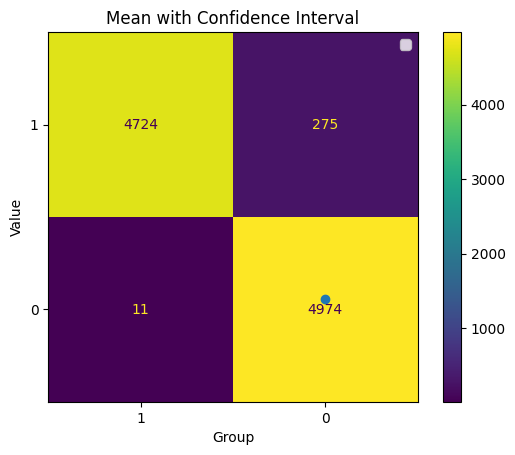

In [6]:
decision_tree = ML_algorithms.train_decision_tree_model(df_a, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_a)

**Hist Gradient Boosting Classifier**

Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 70.15278911590576
Best parameters found:  {'l2_regularization': 0.3, 'learning_rate': 0.1, 'max_depth': 7, 'max_iter': 452, 'min_samples_leaf': 18}
Best score on training data:  1.0
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3549
           1       1.00      1.00      1.00      3439

    accuracy                           1.00      6988
   macro avg       1.00      1.00      1.00      6988
weighted avg       1.00      1.00      1.00      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1517
           1       0.99      1.00      0.99      1479

    accuracy                           0.99      2996
   macro avg       0.99      0.99      0.99      2996
weighted avg       0.99      0.99      0.99      2996


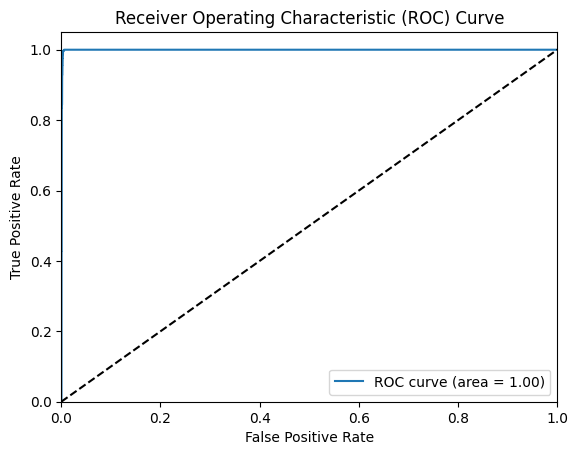

AUC Score: 0.9990678175755512


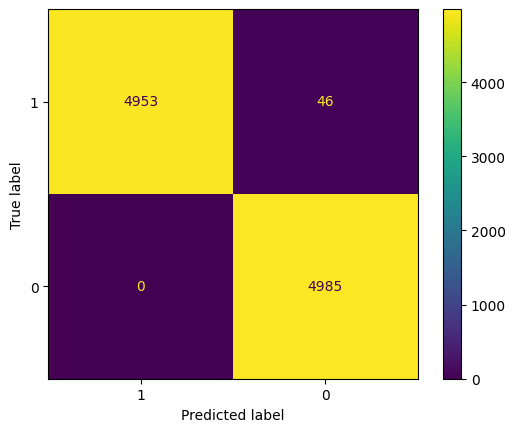

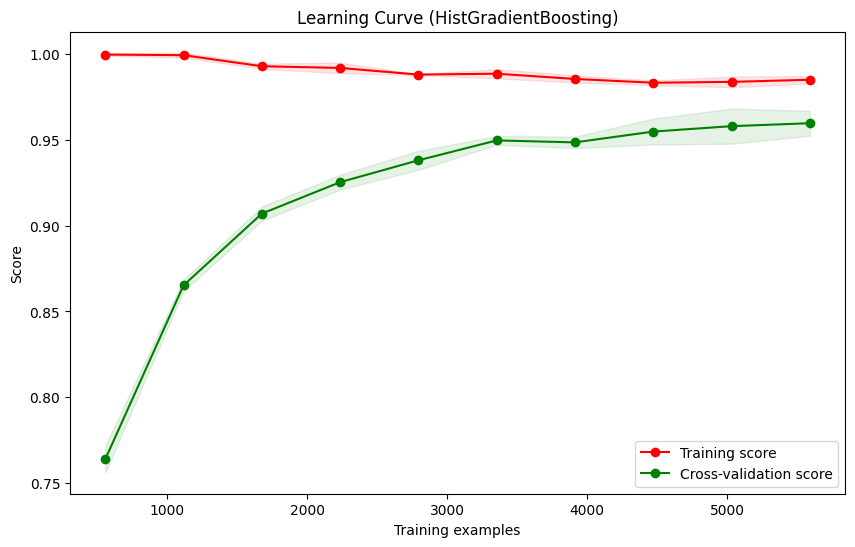

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9914163090128756, 0.9828326180257511, 0.9856938483547926, 0.9856938483547926, 0.9899856938483548, 0.9899856938483548, 0.9914163090128756, 0.9856938483547926, 0.9914040114613181, 0.994269340974212]
Mean accuracy: 0.9888391521248119
95% confidence interval: (0.9862518039458311, 0.9914265003037926)


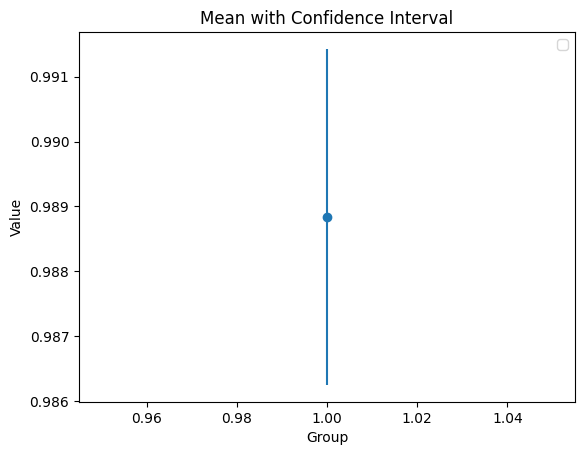

--------------------------------------


In [7]:
hgb = ML_algorithms.train_hist_gradient_boosting_model(df_a, df_original)
ML_algorithms.k_fold_cross_validation_dt(hgb,df_a)

print('--------------------------------------')

## avg_glucose_level

In [8]:
df = df_original.copy()

In [9]:
outliers_utils.visualize_outliers_specific(df, 'avg_glucose_level')

no outliers detected


In [10]:
df_g = outliers_utils.outliers_replace(df, 'avg_glucose_level', 50)

Outliers found:


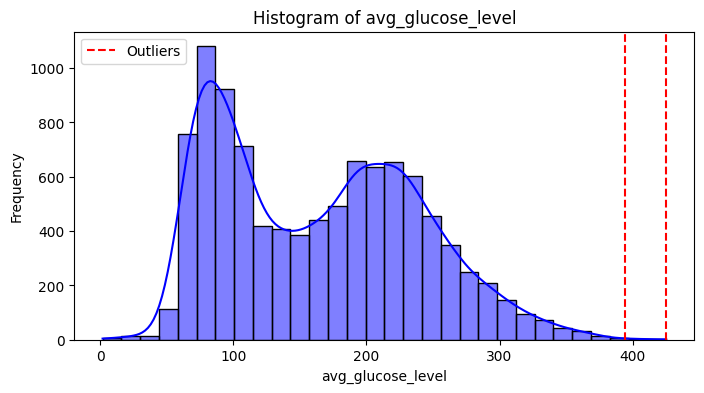

In [11]:
outliers_utils.visualize_outliers_specific(df_g, 'avg_glucose_level')

**Decision Tree**

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.94      0.87      0.91      3490
           1       0.88      0.94      0.91      3498

    accuracy                           0.91      6988
   macro avg       0.91      0.91      0.91      6988
weighted avg       0.91      0.91      0.91      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1519
           1       0.81      0.90      0.85      1477

    accuracy                           0.85      2996
   macro avg       0.85      0.85      0.85      2996
weighted avg       0.85      0.85      0.85      2996

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      4999
           1       0.86      0.95      0.91      4985

    accuracy                           0.90      9984


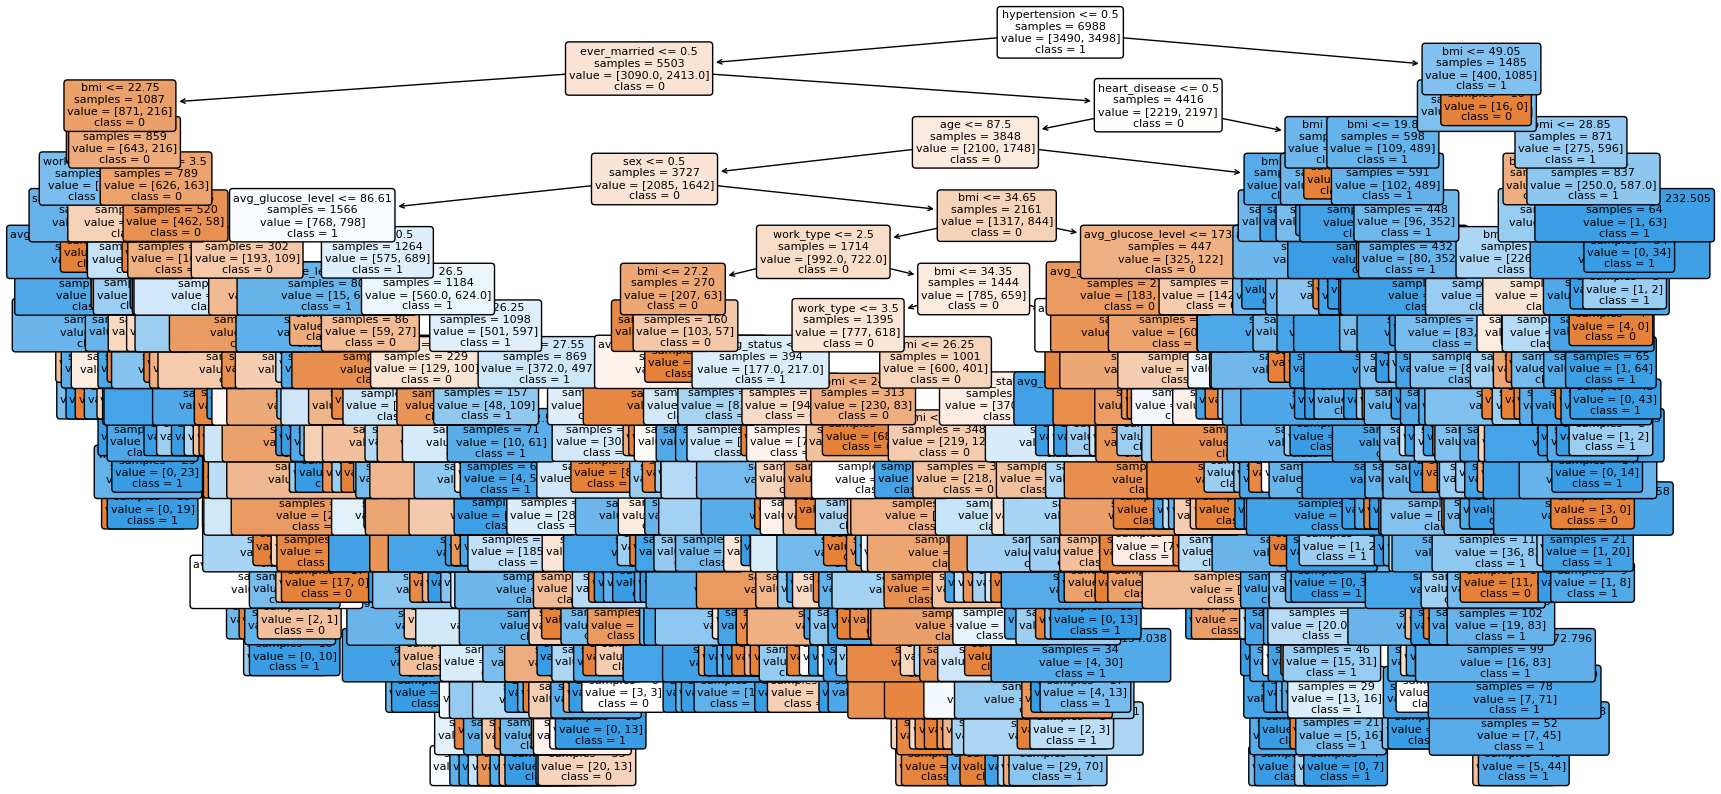

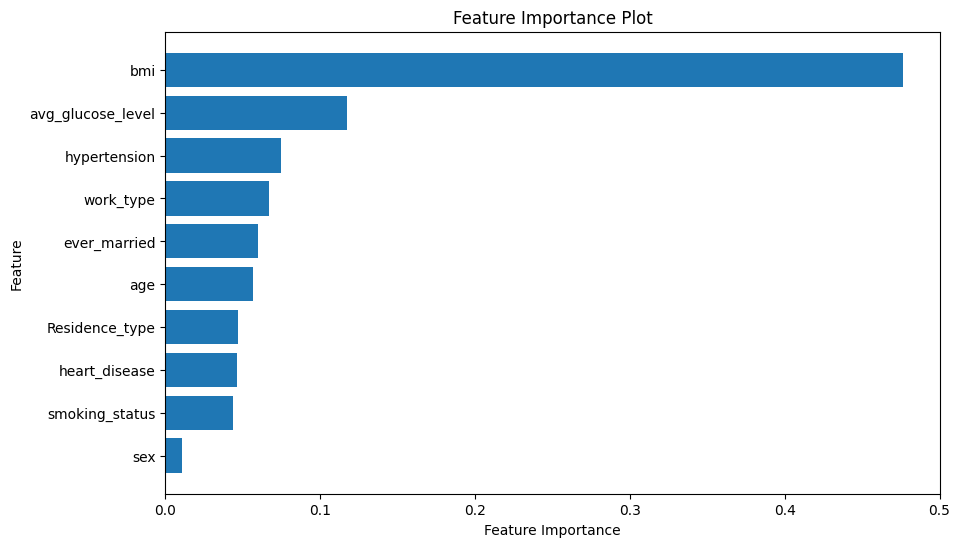

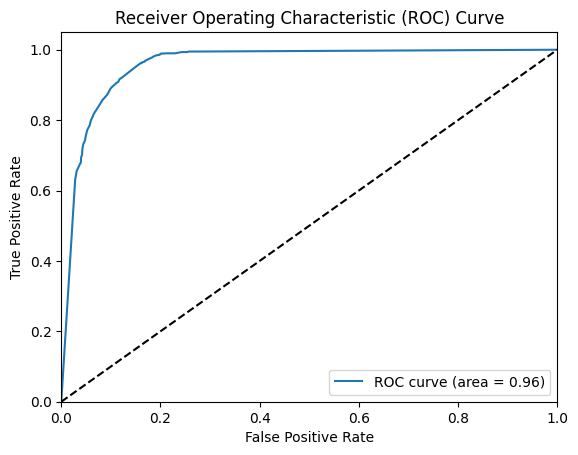

AUC Score: 0.9580323486964193


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.804005722460658, 0.8183118741058655, 0.8326180257510729, 0.8311874105865522, 0.8512160228898427, 0.7854077253218884, 0.8397711015736766, 0.8140200286123033, 0.8409742120343839, 0.828080229226361]
Mean accuracy: 0.8245592352562603
95% confidence interval: (0.8105775038678984, 0.8385409666446222)


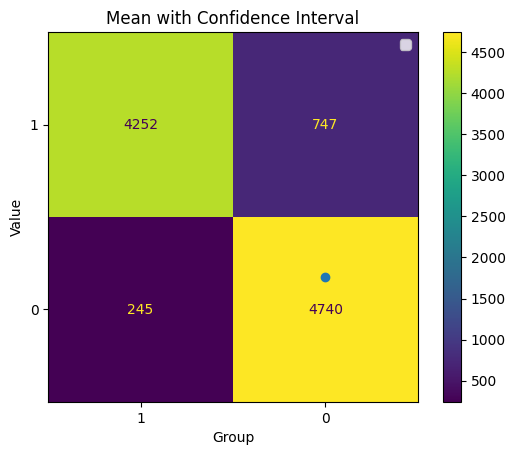

In [12]:
decision_tree = ML_algorithms.train_decision_tree_model(df_g, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_g)

**Hist Gradient Boosting Classifier**

Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 43.228567123413086
Best parameters found:  {'l2_regularization': 0.1, 'learning_rate': 0.3, 'max_depth': 7, 'max_iter': 429, 'min_samples_leaf': 1}
Best score on training data:  0.9582644594318414
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3490
           1       1.00      1.00      1.00      3498

    accuracy                           1.00      6988
   macro avg       1.00      1.00      1.00      6988
weighted avg       1.00      1.00      1.00      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95      1519
           1       0.92      0.97      0.95      1477

    accuracy                           0.95      2996
   macro avg       0.95      0.95      0.95      2996
weighted avg       0.95      0.95      

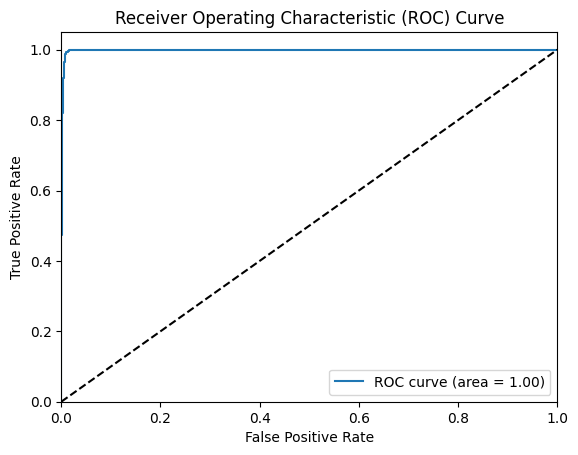

AUC Score: 0.9986007632820446


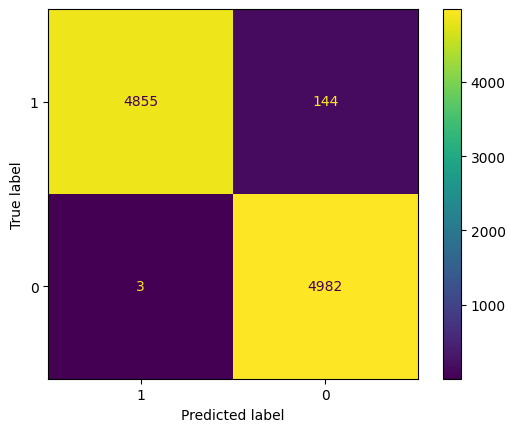

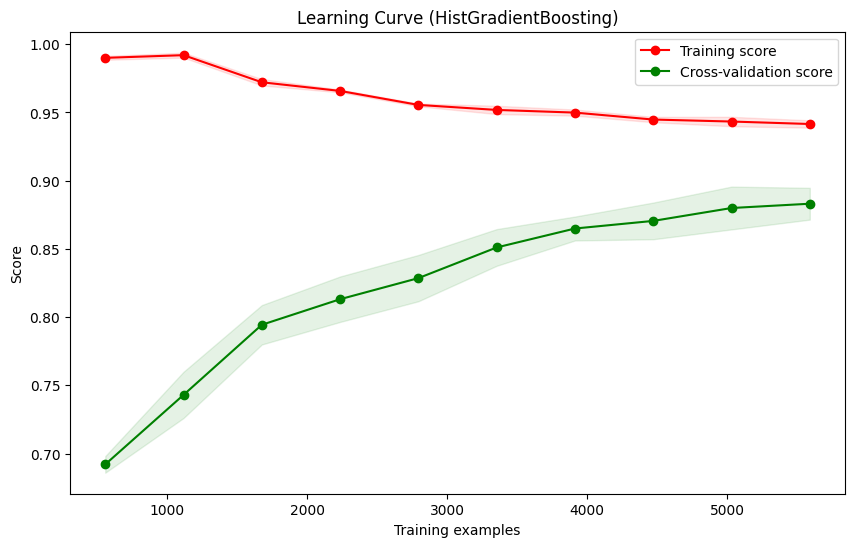

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9341917024320457, 0.9470672389127325, 0.9484978540772532, 0.9542203147353362, 0.9427753934191703, 0.9470672389127325, 0.949928469241774, 0.9556509298998569, 0.9455587392550143, 0.9441260744985673]
Mean accuracy: 0.9469083955384484
95% confidence interval: (0.9425770052813619, 0.9512397857955349)


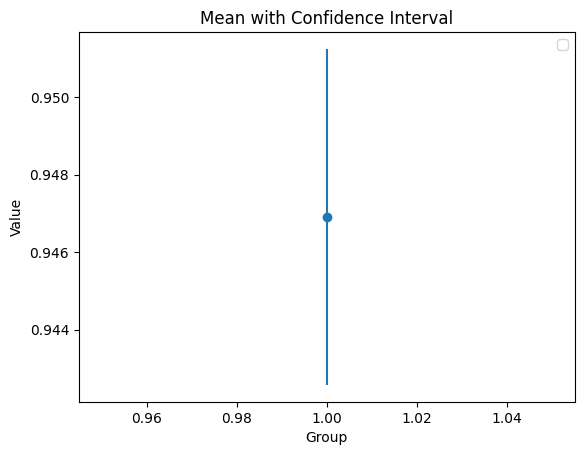

--------------------------------------


In [13]:
hgb = ML_algorithms.train_hist_gradient_boosting_model(df_g, df_original)
ML_algorithms.k_fold_cross_validation_dt(hgb,df_g)

print('--------------------------------------')

## bmi

In [14]:
df = df_original.copy()

Outliers found:


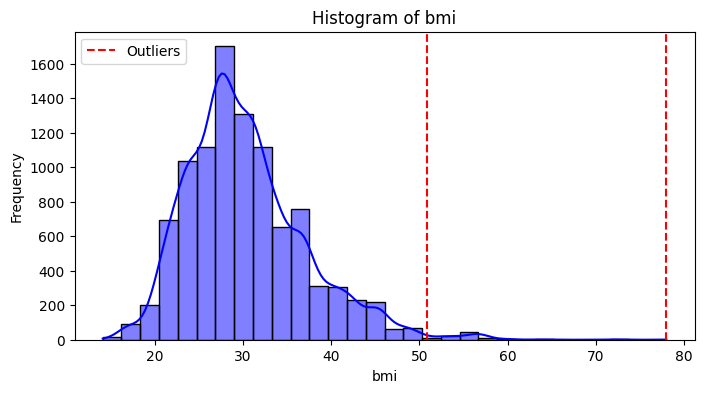

In [15]:
outliers_utils.visualize_outliers_specific(df, 'bmi')

In [16]:
df_b = outliers_utils.outliers_replace(df, 'bmi', 50)

Outliers found:


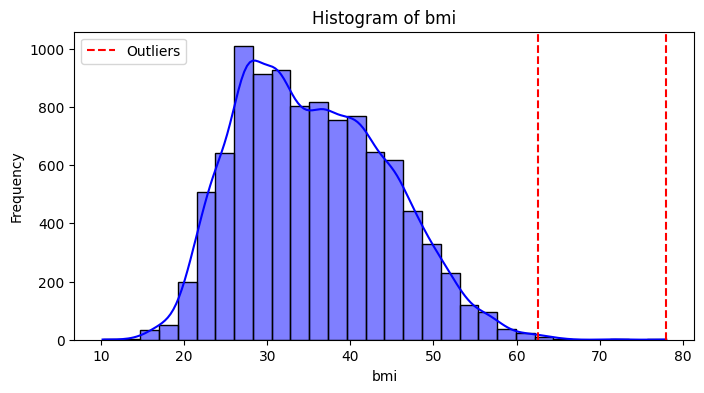

In [17]:
outliers_utils.visualize_outliers_specific(df_b, 'bmi')

**Decision Tree**

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      3494
           1       0.93      0.98      0.95      3494

    accuracy                           0.95      6988
   macro avg       0.95      0.95      0.95      6988
weighted avg       0.95      0.95      0.95      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1497
           1       0.88      0.97      0.92      1499

    accuracy                           0.92      2996
   macro avg       0.92      0.92      0.92      2996
weighted avg       0.92      0.92      0.92      2996

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      4999
           1       0.91      0.99      0.94      4985

    accuracy                           0.94      9984


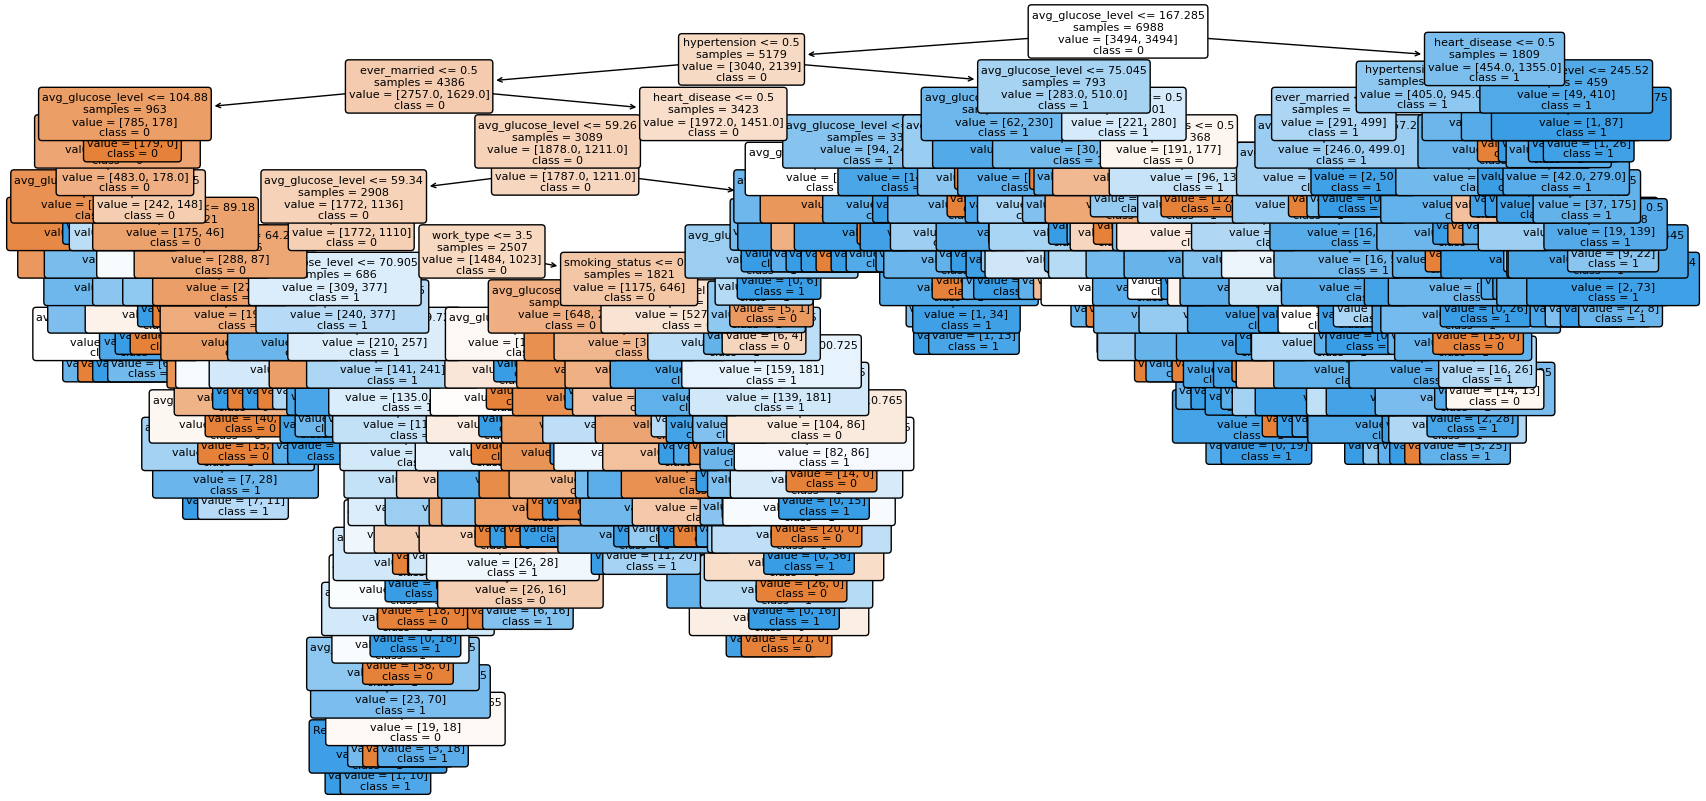

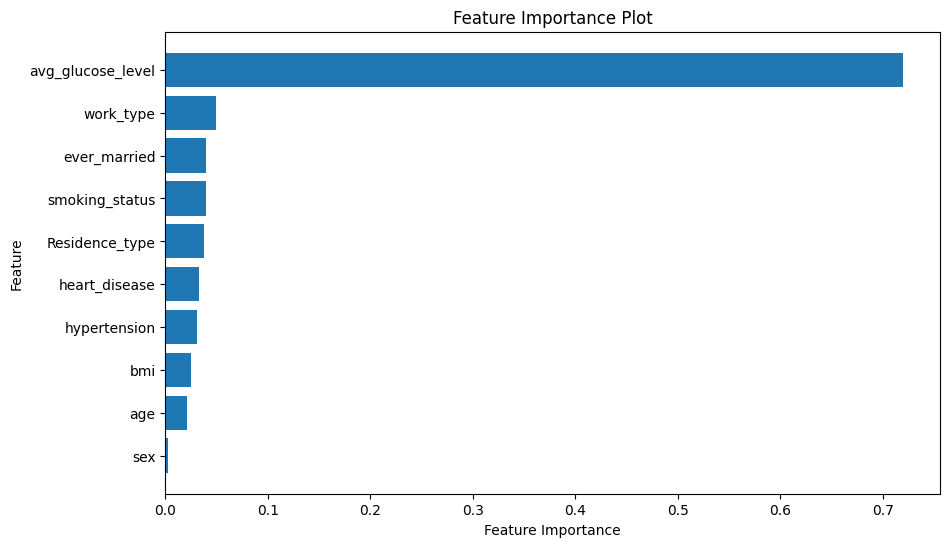

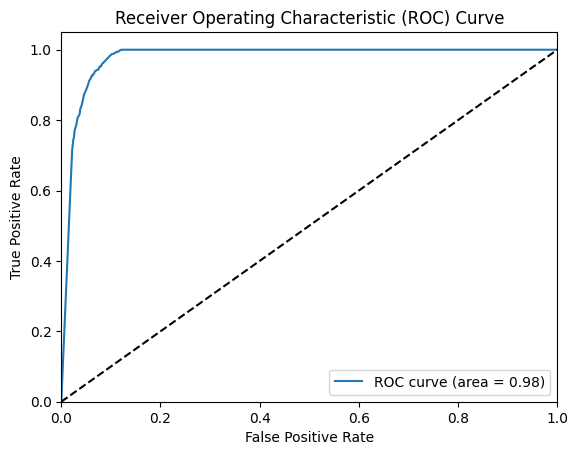

AUC Score: 0.9778043071001362


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8683834048640916, 0.8969957081545065, 0.8497854077253219, 0.8354792560801144, 0.8841201716738197, 0.8583690987124464, 0.9298998569384835, 0.8812589413447782, 0.8667621776504298, 0.8796561604584527]
Mean accuracy: 0.8750710183602445
95% confidence interval: (0.8562534003834894, 0.8938886363369996)


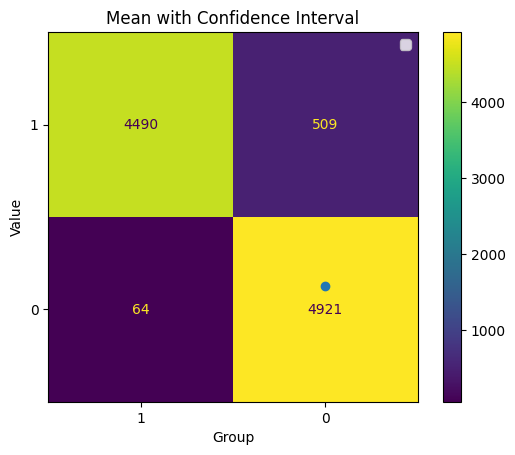

In [18]:
decision_tree = ML_algorithms.train_decision_tree_model(df_b, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_b)

**Hist Gradient Boosting Classifier**

Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 55.432209968566895
Best parameters found:  {'l2_regularization': 0.1, 'learning_rate': 0.3, 'max_depth': 9, 'max_iter': 407, 'min_samples_leaf': 6}
Best score on training data:  0.9765305327709252
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3494
           1       1.00      1.00      1.00      3494

    accuracy                           1.00      6988
   macro avg       1.00      1.00      1.00      6988
weighted avg       1.00      1.00      1.00      6988

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1497
           1       0.94      0.98      0.96      1499

    accuracy                           0.96      2996
   macro avg       0.96      0.96      0.96      2996
weighted avg       0.96      0.96      

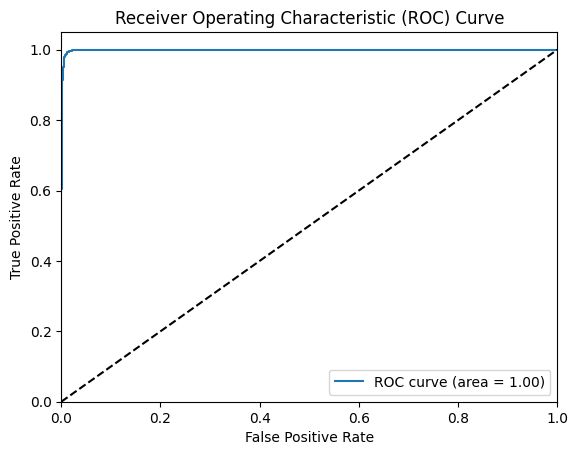

AUC Score: 0.9989660118583396


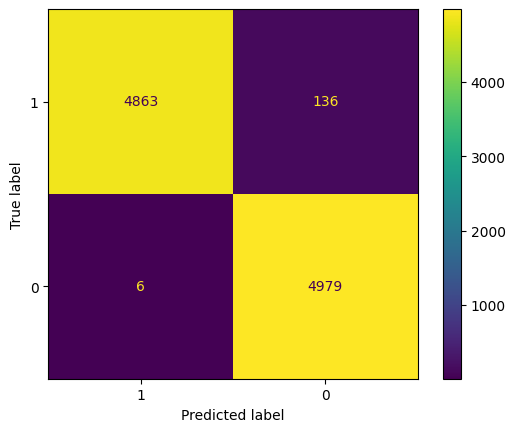

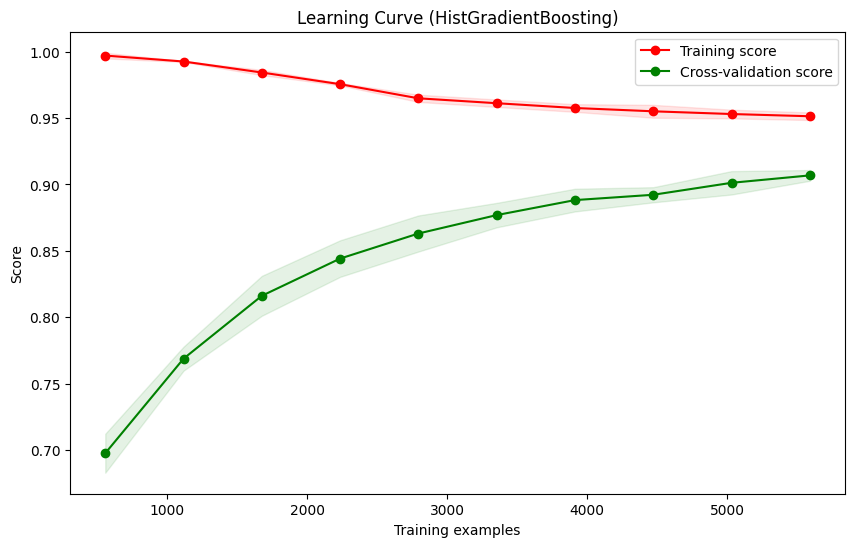

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9585121602288984, 0.9527896995708155, 0.944206008583691, 0.9513590844062947, 0.9742489270386266, 0.9613733905579399, 0.9527896995708155, 0.9699570815450643, 0.9555873925501432, 0.9670487106017192]
Mean accuracy: 0.9587872154654009
95% confidence interval: (0.9520900811217955, 0.9654843498090063)


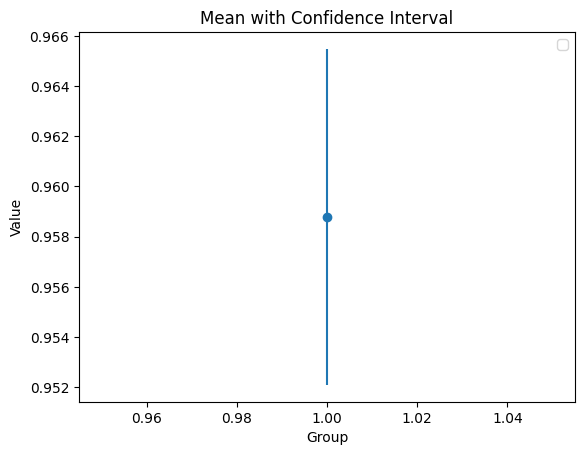

--------------------------------------


In [19]:
hgb = ML_algorithms.train_hist_gradient_boosting_model(df_b, df_original)
ML_algorithms.k_fold_cross_validation_dt(hgb,df_b)

print('--------------------------------------')